In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
# Set the constants
BATCH_SIZE = 32
IMAGE_SIZE = 200
CHANNELS=3
EPOCHS=10

In [3]:
# load training data

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r'../input/vegetable-image-dataset/Vegetable Images/train', 
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 15000 files belonging to 15 classes.


2022-08-22 04:32:59.381622: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-22 04:32:59.503337: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-22 04:32:59.504146: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-22 04:32:59.511905: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [4]:
class_names = train_ds.class_names
class_names

['Bean',
 'Bitter_Gourd',
 'Bottle_Gourd',
 'Brinjal',
 'Broccoli',
 'Cabbage',
 'Capsicum',
 'Carrot',
 'Cauliflower',
 'Cucumber',
 'Papaya',
 'Potato',
 'Pumpkin',
 'Radish',
 'Tomato']

In [5]:
for image_batch, labels_batch in train_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

2022-08-22 04:33:02.214207: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


(32, 200, 200, 3)
[ 4  5 14  4  0  4  0  8  7  5  3 11  9  3 12 14 14  2 12 10  5  5  8  3
 10  4 11  6  4  3  9  6]


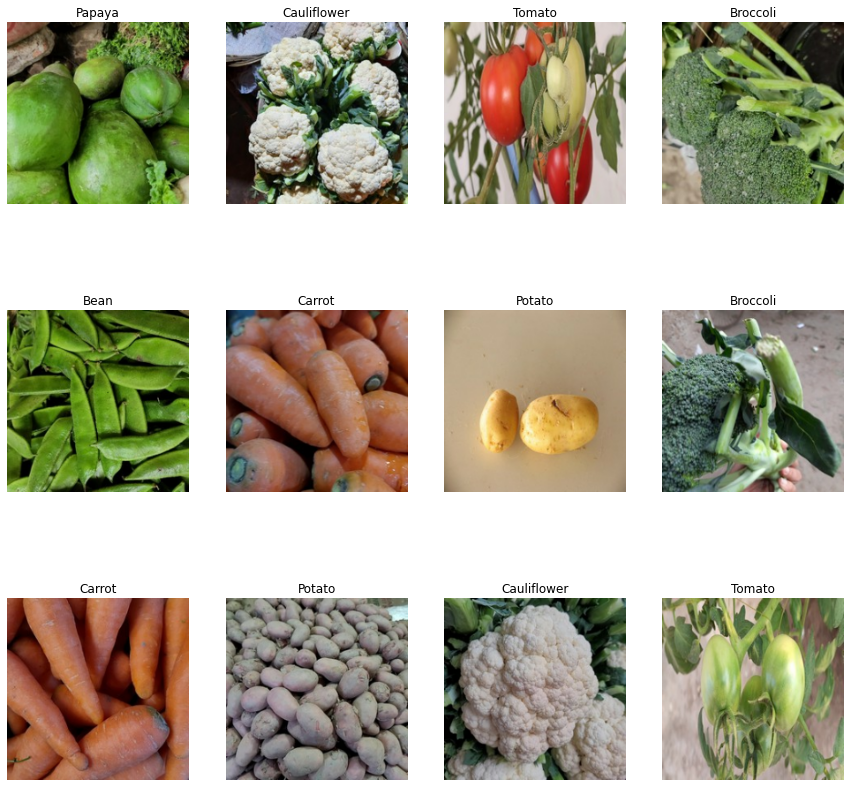

In [6]:
# visualize some images from dataset

plt.figure(figsize=(15, 15))
for image_batch, labels_batch in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [7]:
# resize & rescale dataset

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./IMAGE_SIZE),
])

In [8]:
# augment data
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [9]:
#applying data augmentation to train dataset
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
# build CNN model
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(class_names)

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(25, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(50,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(50,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(50, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(50, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(50, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 200, 200, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 198, 198, 25)        700       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 99, 99, 25)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 97, 97, 50)          11300     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 48, 48, 50)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 46, 46, 50)          22550     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (32, 23, 23, 50)         

In [12]:
# Compiling the Model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    
    verbose=1,
    epochs=20,
)

Epoch 1/20


2022-08-22 04:33:07.363416: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


469/469 [==============================] - 96s 189ms/step - loss: 1.9678 - accuracy: 0.2871
Epoch 2/20
469/469 [==============================] - 79s 168ms/step - loss: 1.3094 - accuracy: 0.5293
Epoch 3/20
469/469 [==============================] - 81s 173ms/step - loss: 0.9686 - accuracy: 0.6560
Epoch 4/20
469/469 [==============================] - 81s 171ms/step - loss: 0.7503 - accuracy: 0.7336
Epoch 5/20
469/469 [==============================] - 83s 175ms/step - loss: 0.6149 - accuracy: 0.7776
Epoch 6/20
469/469 [==============================] - 82s 174ms/step - loss: 0.5327 - accuracy: 0.8112
Epoch 7/20
469/469 [==============================] - 81s 173ms/step - loss: 0.4374 - accuracy: 0.8503
Epoch 8/20
469/469 [==============================] - 83s 175ms/step - loss: 0.3862 - accuracy: 0.8677
Epoch 9/20
469/469 [==============================] - 80s 170ms/step - loss: 0.3527 - accuracy: 0.8824
Epoch 10/20
469/469 [==============================] - 82s 175ms/step - loss: 0.3119

In [14]:
# save model
model.save("vegetable_cnn_model.h5")
print("Model saved!")

Model saved!
